In [98]:
# 1st step - Read data and sample to training and validation.
# 2nd step - trim down the dataset for certain modeling (use linear/log regression to do the initial feature selection)
# 3rd step - build models and compare and choose the best one based on validation
# 4th step - Score all the data and output

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib, re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
#nbayes = MultinomialNB()
#nbayes.fit(sms_messages_train, labels_train)
#accuracy=nbayes.score(sms_messages_test,labels_test)


In [99]:
# import data
RS_fullset=pd.read_csv("C:\Mark_Mao\MLAL_capstone\CleanSet\RoadService_activeset_noDup.csv")
#check
print(RS_fullset.info())
#print(list(Profile_fullset.columns) )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3511 entries, 0 to 3510
Data columns (total 63 columns):
Household Key                       3511 non-null float64
m_Avg_ERS_Cost_PerYr                3511 non-null float64
m_Avg_ERS_ENT_Count_PerYr           3511 non-null float64
m_Prob_ERS_ENT_Used                 3511 non-null float64
Car_American                        3511 non-null int64
Car_American_Luxury                 3511 non-null int64
Car_European                        3511 non-null int64
Car_European_Luxury                 3511 non-null int64
Car_Japan                           3511 non-null int64
Car_Japan_Luxury                    3511 non-null int64
Car_Other                           3511 non-null int64
m_ExpensiveModel                    3511 non-null int64
m_SportsCar                         3511 non-null int64
Dwell_MFDU                          3511 non-null float64
Dwell_POBOX                         3511 non-null float64
Dwell_SFDU                          3511 

In [100]:
# Looks like target is not created correctly with 0/1 - Will create a new field for this
RS_fullset['m_Prob_ERS_ENT_Used'] = RS_fullset['m_Avg_ERS_ENT_Count_PerYr'].apply(lambda x: 1 if x >0 else 0)

In [101]:
RS_train, RS_test = train_test_split(RS_fullset, test_size=0.3,random_state=0)

In [102]:
RS_nonzeroset=RS_fullset[RS_fullset['m_Prob_ERS_ENT_Used']>0]
RS_nonzero_train, RS_nonzero_test = train_test_split(RS_nonzeroset, test_size=0.3,random_state=0)

In [103]:
X_list=['m_PlusMember','Car_American' ,'Car_American_Luxury',  'Car_European',
'Car_European_Luxury', 'Car_Japan','Car_Japan_Luxury' ,'Car_Other',
    'm_SportsCar','m_ExpensiveModel', 'm_ProfileMissing', 'm_TenureYr', 
        'm_OccupationMissing',  'm_IncomeMissing', 
        'm_HomeownerFlag', 'm_RenterFlag', 'm_memberage',
        'm_nChild', 'm_LenResidence', 
         'm_Income', 'm_Credit', 
        'm_MailRespondYes', 'm_NoChild', 
        'm_PrimaryMember', 'm_OptIn_Publication', 'm_CashCallYes',
         'm_NewMover', 'Occ_Blue_Collar', 
        'Occ_Management', 'Occ_OfficeAdmin', 'Occ_Other', 
        'Occ_Professional', 'Occ_Retired', 'Occ_Sales', 
        'Occ_Technical', 'Ed_Completed College', 
        'Ed_Graduated School', 'Ed_High School', 
        'Ed_Some College', 'Mosaic_Bourgeois Prosperity', 
        'Mosaic_Career and Family', 'Mosaic_Comfortable Retirement',
        'Mosaic_Hard Working Blue Collar', 'Mosaic_Low Income Elders',
        'Mosaic_Metropolitan Strugglers', 
        'Mosaic_Post Industrial Survivors', 
        'Mosaic_Routine Service Workers', 'Mosaic_Rural Inheritance',
        'Mosaic_Sophisticated Singles', 'm_AutoRenew', 'Dwell_MFDU', 
        'Dwell_POBOX', 'Dwell_SFDU'  
]

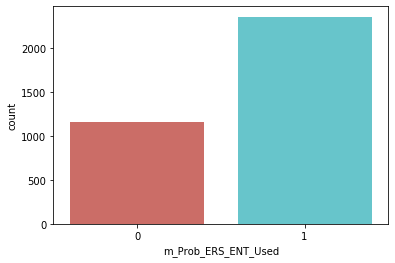

<Figure size 432x288 with 0 Axes>

In [104]:
sns.countplot(x='m_Prob_ERS_ENT_Used',data=RS_fullset,palette='hls')
plt.show()
plt.savefig('count_plot')

In [105]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm

In [106]:
########### Feature selection on Probability of roadside service use  #############

Modeling_X=RS_train[X_list]
Test_X=RS_test[X_list]

X_train = sm.add_constant(Modeling_X)
y_train = RS_train.loc[:,'m_Prob_ERS_ENT_Used']

X_test = sm.add_constant(Test_X)
y_test = RS_test.loc[:,'m_Prob_ERS_ENT_Used']

logit_model_Pr=sm.Logit(y_train,X_train)
result=logit_model_Pr.fit()
print(result.summary2())

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encounter

         Current function value: 0.530308
         Iterations: 35
                                          Results: Logit
Model:                        Logit                         Pseudo R-squared:           0.160     
Dependent Variable:           m_Prob_ERS_ENT_Used           AIC:                        2711.9331 
Date:                         2020-05-30 19:18              BIC:                        3019.6881 
No. Observations:             2457                          Log-Likelihood:             -1303.0   
Df Model:                     52                            LL-Null:                    -1551.1   
Df Residuals:                 2404                          LLR p-value:                8.7791e-74
Converged:                    0.0000                        Scale:                      1.0000    
No. Iterations:               35.0000                                                             
-------------------------------------------------------------------------------------

In [107]:
########### Feature selection on  Probability of Usage roadside service or not Flag  #############

X_list_final=['m_PlusMember','Car_American' ,'Car_American_Luxury',  'Car_European',
'Car_European_Luxury', 'Car_Japan','Car_Japan_Luxury' ,'Car_Other',
    'm_TenureYr', 'm_memberage','m_PrimaryMember'
]

Modeling_X=RS_train[X_list_final]
Test_X=RS_test[X_list_final]

X_train = sm.add_constant(Modeling_X)
y_train = RS_train.loc[:,'m_Prob_ERS_ENT_Used']

X_test = sm.add_constant(Test_X)
y_test = RS_test.loc[:,'m_Prob_ERS_ENT_Used']

logit_model_pr=sm.Logit(y_train,X_train)
result=logit_model_pr.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.536496
         Iterations 7
                           Results: Logit
Model:              Logit               Pseudo R-squared: 0.150     
Dependent Variable: m_Prob_ERS_ENT_Used AIC:              2660.3395 
Date:               2020-05-30 19:18    BIC:              2730.0199 
No. Observations:   2457                Log-Likelihood:   -1318.2   
Df Model:           11                  LL-Null:          -1551.1   
Df Residuals:       2445                LLR p-value:      5.8127e-93
Converged:          1.0000              Scale:            1.0000    
No. Iterations:     7.0000                                          
--------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------------
const                 -0.5241   0.3646 -1.4373 0.1506 -1.2388 0.1906
m_PlusMember           0.243

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.64      0.51      0.57       354
           1       0.77      0.86      0.81       700

    accuracy                           0.74      1054
   macro avg       0.71      0.68      0.69      1054
weighted avg       0.73      0.74      0.73      1054

Accuracy of this classifier on test set: 0.74
0.7370777370777372


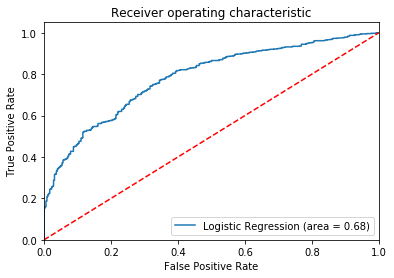

In [108]:
X_list_final=['m_PlusMember','Car_American' ,'Car_American_Luxury',  'Car_European',
'Car_European_Luxury', 'Car_Japan','Car_Japan_Luxury' ,'Car_Other',
    'm_TenureYr', 'm_memberage','m_PrimaryMember'
]

Modeling_X=RS_train[X_list_final]
Test_X=RS_test[X_list_final]

X_train = sm.add_constant(Modeling_X)
y_train = RS_train.loc[:,'m_Prob_ERS_ENT_Used']

X_test = sm.add_constant(Test_X)
y_test = RS_test.loc[:,'m_Prob_ERS_ENT_Used']

logreg_pr = LogisticRegression()
logreg_pr.fit(X_train,y_train )

y_pred = logreg_pr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print('Accuracy of this classifier on test set: {:.2f}'.format(logreg_pr.score(X_test, y_test)))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_pr, X_train, y_train, cv=3)
print(scores.mean())

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_pr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_pr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

DT_pr = DecisionTreeClassifier(max_depth=15, min_samples_split=50,min_samples_leaf=20,random_state=0)
print(cross_val_score(DT_pr, X_train, y_train, cv=3))

RF_pr = RandomForestClassifier(n_estimators=40, max_depth=15,min_samples_split=50,min_samples_leaf=20, random_state=0)
print(cross_val_score(RF_pr, X_train, y_train, cv=3))

ET_pr = ExtraTreesClassifier(n_estimators=40, max_depth=15,min_samples_split=50,min_samples_leaf=20, random_state=0)
print(cross_val_score(ET_pr, X_train, y_train, cv=3))

GB_pr = GradientBoostingClassifier(learning_rate=1,min_samples_split=50, min_samples_leaf=25, n_estimators=200,random_state=0)
print(cross_val_score(GB_pr, X_train, y_train, cv=3))

bdt_real_pr = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10,min_samples_split=50, min_samples_leaf=25,), n_estimators=200,learning_rate=1)
print(cross_val_score(bdt_real_pr, X_train, y_train, cv=3))


[0.72039072 0.66788767 0.7020757 ]
[0.73748474 0.71916972 0.71794872]
[0.67399267 0.67399267 0.67399267]
[0.68864469 0.62393162 0.68376068]
[0.65567766 0.63247863 0.65201465]


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


              precision    recall  f1-score   support

           0       0.67      0.42      0.52       354
           1       0.75      0.89      0.82       700

    accuracy                           0.74      1054
   macro avg       0.71      0.66      0.67      1054
weighted avg       0.73      0.74      0.72      1054

Accuracy of this classifier on test set: 0.74
0.724867724867725


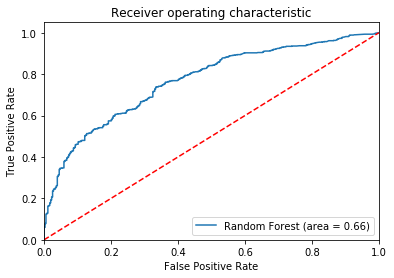

In [110]:
X_list_final=['m_PlusMember','Car_American' ,'Car_American_Luxury',  'Car_European',
'Car_European_Luxury', 'Car_Japan','Car_Japan_Luxury' ,'Car_Other',
    'm_TenureYr', 'm_memberage','m_PrimaryMember'
]

Modeling_X=RS_train[X_list_final]
Test_X=RS_test[X_list_final]

X_train = sm.add_constant(Modeling_X)
y_train = RS_train.loc[:,'m_Prob_ERS_ENT_Used']

X_test = sm.add_constant(Test_X)
y_test = RS_test.loc[:,'m_Prob_ERS_ENT_Used']

RF_pr.fit(X_train,y_train )

y_pred =RF_pr.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print('Accuracy of this classifier on test set: {:.2f}'.format(RF_pr.score(X_test, y_test)))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(RF_pr, X_train, y_train, cv=3)
print(scores.mean())

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, RF_pr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, RF_pr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_pr_ROC')
plt.show()


In [111]:
# Logistic regression is a better model here.
logreg_pr.fit(X_train, y_train)
y_train_pred= pd.DataFrame(logreg_pr.predict_proba(X_train), columns = ['Pred_Prob_RS_Use0','Pred_Prob_RS_Use1']) 
y_test_pred = pd.DataFrame(logreg_pr.predict_proba(X_test), columns =  ['Pred_Prob_RS_Use0','Pred_Prob_RS_Use1']) 
#print(y_test_pred.head(10))
RS_train.reset_index(drop=True, inplace=True)
y_train_pred.reset_index(drop=True, inplace=True)
RS_test.reset_index(drop=True, inplace=True)
y_test_pred.reset_index(drop=True, inplace=True)
RS_train_out=pd.concat([RS_train, y_train_pred],axis=1)
RS_test_out=pd.concat([RS_test, y_test_pred],axis=1)

#cancel_out=pd.concat([cancel_train_out, cancel_test_out],axis=0)
# only keep the active member prediction for segementation.
#cancel_out_active=cancel_out[cancel_out['Voluntary Cancel Flag']==0]
#RS_test_out.to_csv(r'C:\Mark_Mao\MLAL_capstone\CleanSet\RS_out_check.csv')
#print(cancel_out_active['Household Key'].describe())


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


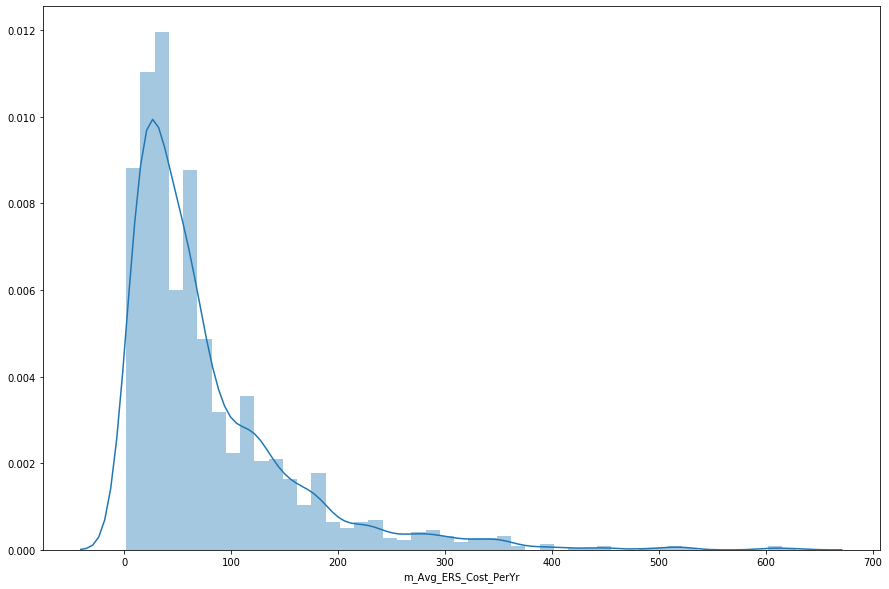

In [112]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(RS_nonzero_train['m_Avg_ERS_Cost_PerYr'])

In [142]:
print(RS_nonzero.info())

NameError: name 'RS_nonzero' is not defined

In [113]:
########### Feature selection on cost per yr Flag  #############

Modeling_X=RS_nonzero_train[X_list]
Test_X=RS_nonzero_test[X_list]

X_train = sm.add_constant(Modeling_X)
y_train = RS_nonzero_train.loc[:,'m_Avg_ERS_Cost_PerYr']

X_test = sm.add_constant(Test_X)
y_test = RS_nonzero_test.loc[:,'m_Avg_ERS_Cost_PerYr']

linreg_cost=sm.OLS(y_train,X_train)
result=linreg_cost.fit()
print(result.summary2())

# have multicollinearity issue. Will size down and try it again

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                           Results: Ordinary least squares
Model:                    OLS                      Adj. R-squared:         0.188     
Dependent Variable:       m_Avg_ERS_Cost_PerYr     AIC:                    18839.8926
Date:                     2020-05-30 19:18         BIC:                    19126.5126
No. Observations:         1649                     Log-Likelihood:         -9366.9   
Df Model:                 52                       F-statistic:            8.315     
Df Residuals:             1596                     Prob (F-statistic):     5.28e-53  
R-squared:                0.213                    Scale:                  5195.5    
-------------------------------------------------------------------------------------
                                   Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
-------------------------------------------------------------------------------------
const                             -11.4016  35.3092 -0.3229 0.7468  -80.6589  57.

In [114]:
# 2nd round of features
X_list_final=['m_PlusMember','Car_American' ,'Car_American_Luxury',  'Car_European',
'Car_European_Luxury', 'Car_Japan','Car_Japan_Luxury' ,'Car_Other',
    'm_TenureYr', 'm_PrimaryMember','m_HomeownerFlag',
              'm_LenResidence','m_MailRespondYes','m_OptIn_Publication','m_NewMover',
              'Ed_Completed College','Ed_High School','Ed_Some College','Dwell_SFDU',
              'Mosaic_Metropolitan Strugglers','Mosaic_Sophisticated Singles',
             ]

Modeling_X=RS_nonzero_train[X_list_final]
Test_X=RS_nonzero_test[X_list_final]

X_train = sm.add_constant(Modeling_X)
y_train = RS_nonzero_train.loc[:,'m_Avg_ERS_Cost_PerYr']

X_test = sm.add_constant(Test_X)
y_test = RS_nonzero_test.loc[:,'m_Avg_ERS_Cost_PerYr']

linreg_cost=sm.OLS(y_train,X_train)
result=linreg_cost.fit()
print(result.summary2())

                         Results: Ordinary least squares
Model:                   OLS                     Adj. R-squared:        0.188     
Dependent Variable:      m_Avg_ERS_Cost_PerYr    AIC:                   18808.8922
Date:                    2020-05-30 19:18        BIC:                   18927.8665
No. Observations:        1649                    Log-Likelihood:        -9382.4   
Df Model:                21                      F-statistic:           19.15     
Df Residuals:            1627                    Prob (F-statistic):    8.14e-64  
R-squared:               0.198                   Scale:                 5193.2    
----------------------------------------------------------------------------------
                                Coef.   Std.Err.    t    P>|t|    [0.025   0.975] 
----------------------------------------------------------------------------------
const                          -64.4870  24.7660 -2.6039 0.0093 -113.0636 -15.9105
m_PlusMember                  

In [115]:
from sklearn.linear_model import (
    LinearRegression, TheilSenRegressor, RANSACRegressor, HuberRegressor)
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_list_final=['m_PlusMember','Car_American' ,'Car_American_Luxury',  'Car_European',
'Car_European_Luxury', 'Car_Japan','Car_Japan_Luxury' ,'Car_Other',
    'm_TenureYr', 'm_PrimaryMember',
              'm_LenResidence','m_OptIn_Publication',
              'Ed_Completed College','Ed_High School','Ed_Some College','Dwell_SFDU',
              'Mosaic_Metropolitan Strugglers','Mosaic_Sophisticated Singles',
             ]

Modeling_X=RS_train[X_list_final]
Test_X=RS_test[X_list_final]

X_train = sm.add_constant(Modeling_X)
y_train = RS_train.loc[:,'m_Avg_ERS_Cost_PerYr']

X_test = sm.add_constant(Test_X)
y_test = RS_test.loc[:,'m_Avg_ERS_Cost_PerYr']


OLS=LinearRegression()
Theil_Sen=TheilSenRegressor(random_state=0)
RANSAC=RANSACRegressor(random_state=0)
HuberRegressor=HuberRegressor()
    
OLS.fit(X_train, y_train)
print('MSE of OLS on test set: {:.2f}'.format(mean_squared_error(OLS.predict(X_test), y_test)))

Theil_Sen.fit(X_train, y_train)
print('MSE of Theil_Sen on test set: {:.2f}'.format(mean_squared_error(Theil_Sen.predict(X_test), y_test)))

RANSAC.fit(X_train, y_train)
print('MSE of RANSAC on test set: {:.2f}'.format(mean_squared_error(RANSAC.predict(X_test), y_test)))

HuberRegressor.fit(X_train, y_train)
print('MSE of HuberRegressor on test set: {:.2f}'.format(mean_squared_error(HuberRegressor.predict(X_test), y_test)))


MSE of OLS on test set: 4029.62
MSE of Theil_Sen on test set: 3933.55
MSE of RANSAC on test set: 5735.75
MSE of HuberRegressor on test set: 4287.77


In [116]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

DT_Cost = DecisionTreeRegressor(max_depth=15, min_samples_split=50,min_samples_leaf=20,random_state=0)
RF_Cost = RandomForestRegressor(n_estimators=15, max_depth=15,min_samples_split=50,min_samples_leaf=20, random_state=0)
ET_Cost = ExtraTreesRegressor(n_estimators=15, max_depth=15,min_samples_split=50,min_samples_leaf=20, random_state=0)
GB_Cost = GradientBoostingRegressor(learning_rate=1,min_samples_split=50, min_samples_leaf=25, n_estimators=200,random_state=0)

DT_Cost.fit(X_train, y_train)
print('MSE of Decision Tree on test set: {:.2f}'.format(mean_squared_error(DT_Cost.predict(X_test), y_test)))

RF_Cost.fit(X_train, y_train)
print('MSE of Random Forest on test set: {:.2f}'.format(mean_squared_error(RF_Cost.predict(X_test), y_test)))

ET_Cost.fit(X_train, y_train)
print('MSE of ExtraTree on test set: {:.2f}'.format(mean_squared_error(ET_Cost.predict(X_test), y_test)))

GB_Cost.fit(X_train, y_train)
print('MSE of Gradient boost on test set: {:.2f}'.format(mean_squared_error(GB_Cost.predict(X_test), y_test)))


MSE of Decision Tree on test set: 4440.31
MSE of Random Forest on test set: 4343.26
MSE of ExtraTree on test set: 4346.87
MSE of Gradient boost on test set: 5668.89


In [117]:
#TheilSenRegressor produces the lowest mse and is the better model

Theil_Sen.fit(X_train, y_train)
y_train_pred= pd.DataFrame(Theil_Sen.predict(X_train), columns = ['Pred_CostPerYr']) 
y_test_pred = pd.DataFrame(Theil_Sen.predict(X_test), columns = ['Pred_CostPerYr']) 
#print(y_test_pred.head(10))
RS_train.reset_index(drop=True, inplace=True)
y_train_pred.reset_index(drop=True, inplace=True)
RS_test.reset_index(drop=True, inplace=True)
y_test_pred.reset_index(drop=True, inplace=True)
RS_train_out=pd.concat([RS_train_out, y_train_pred],axis=1)
RS_test_out=pd.concat([RS_test_out, y_test_pred],axis=1)


# only keep the active member prediction for segementation.
#cancel_out_active=cancel_out[cancel_out['Voluntary Cancel Flag']==0]
#prod_test_out.to_csv(r'C:\Mark_Mao\MLAL_capstone\CleanSet\prod_out_check.csv')
#print(cancel_out_active['Household Key'].describe())

In [129]:
RS_out=pd.concat([RS_train_out, RS_test_out],axis=0)
RS_out['Pred_ExpectedCostPerYr'] = RS_out.apply(lambda row: max([row['Pred_CostPerYr'], 0])*row['Pred_Prob_RS_Use1'], axis=1)
RS_out.to_csv(r'C:\Mark_Mao\MLAL_capstone\CleanSet\RS_out.csv')

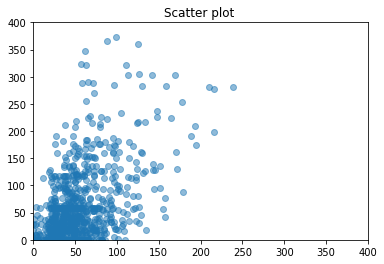

In [130]:
plt.scatter(RS_test_out['Pred_CostPerYr'], RS_test_out['m_Avg_ERS_Cost_PerYr'], alpha=0.5)
plt.title('Scatter plot ')
plt.ylim(0, 400)
plt.xlim(0, 400)
plt.show()

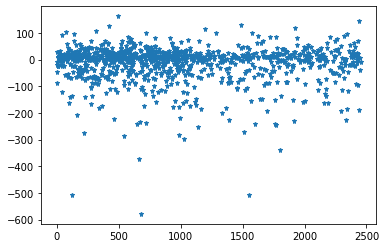

In [141]:
check=RS_out[['Household Key','Pred_ExpectedCostPerYr','m_Avg_ERS_Cost_PerYr']].sample(n=1000, random_state=1)
check['diff']=check['Pred_ExpectedCostPerYr']-check['m_Avg_ERS_Cost_PerYr']

plt.plot(check['diff'], '*', markersize=5)
plt.show()

In [143]:
print(RS_nonzeroset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 3510
Data columns (total 63 columns):
Household Key                       2356 non-null float64
m_Avg_ERS_Cost_PerYr                2356 non-null float64
m_Avg_ERS_ENT_Count_PerYr           2356 non-null float64
m_Prob_ERS_ENT_Used                 2356 non-null int64
Car_American                        2356 non-null int64
Car_American_Luxury                 2356 non-null int64
Car_European                        2356 non-null int64
Car_European_Luxury                 2356 non-null int64
Car_Japan                           2356 non-null int64
Car_Japan_Luxury                    2356 non-null int64
Car_Other                           2356 non-null int64
m_ExpensiveModel                    2356 non-null int64
m_SportsCar                         2356 non-null int64
Dwell_MFDU                          2356 non-null float64
Dwell_POBOX                         2356 non-null float64
Dwell_SFDU                          2356 no

count    3511.000000
mean        0.296956
std         0.425629
min         0.000000
25%         0.000000
50%         0.000000
75%         0.666667
max         1.000000
Name: m_PlusMember, dtype: float64
['0.00', '1.00', '2.00', '3.00', '4.00', '5.00', '6.00', '7.00', '8.00', '9.00', '10.00', '11.00', '12.00', '13.00']


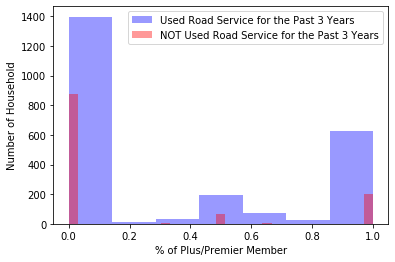

<Figure size 432x288 with 0 Axes>

In [176]:

import seaborn.apionly as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

print(RS_fullset['m_PlusMember'].describe())
RS_fullset1=RS_fullset[RS_fullset['m_Prob_ERS_ENT_Used']==1]
RS_fullset0=RS_fullset[RS_fullset['m_Prob_ERS_ENT_Used']==0]

ax=sns.distplot(RS_fullset1['m_PlusMember'] , color="blue", label="Used Road Service for the Past 3 Years",kde=False)
ax=sns.distplot(RS_fullset0['m_PlusMember'] , color="red", label="NOT Used Road Service for the Past 3 Years",kde=False)

ax.set(xlabel="% of Plus/Premier Member", ylabel = "Number of Household")
print(xlabels)
#ax.set_xticklabels(xlabels)
plt.legend()
plt.show()
plt.savefig('Frequency_plot')
